In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("~/Downloads/Thebrief/archive(2)/spotify_songs.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [15]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_date,release_year,duration_sec
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,2019-06-14,2019.0,3.245900
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,2019-12-13,2019.0,2.710000
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2019-07-05,2019.0,2.943600
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,2019-07-19,2019.0,2.818217
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,2019-03-05,2019.0,3.150867


In [4]:
# What are the top 5 most popular artists?
# Show a bar chart of the top 5 artists by average popularity

In [5]:
top_artists = df.groupby('track_artist')['track_popularity'].mean().sort_values(ascending=False).head(5)
print(top_artists)


track_artist
Trevor Daniel    97.000000
Y2K              91.000000
Don Toliver      90.714286
Roddy Ricch      88.210526
DaBaby           87.857143
Name: track_popularity, dtype: float64


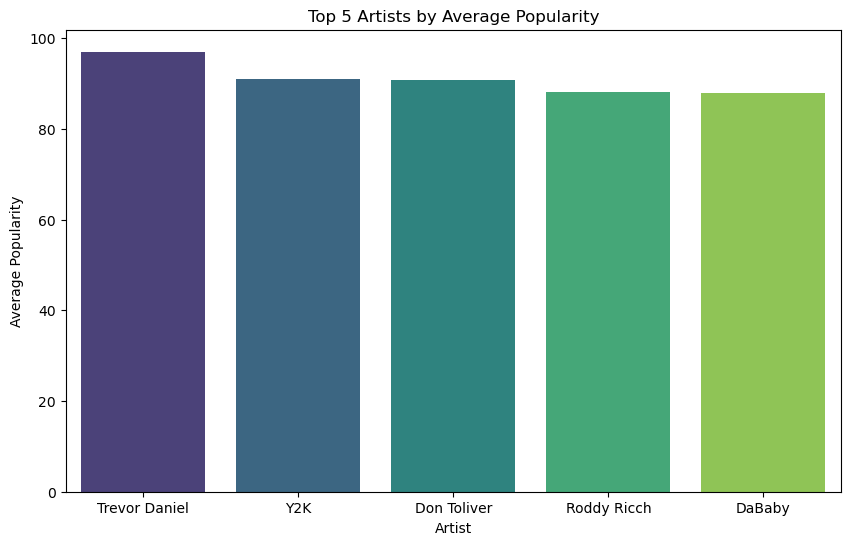

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.index, y=top_artists.values, palette='viridis', orient='v')
plt.title('Top 5 Artists by Average Popularity')
plt.xlabel('Artist')
plt.ylabel('Average Popularity')
plt.show()

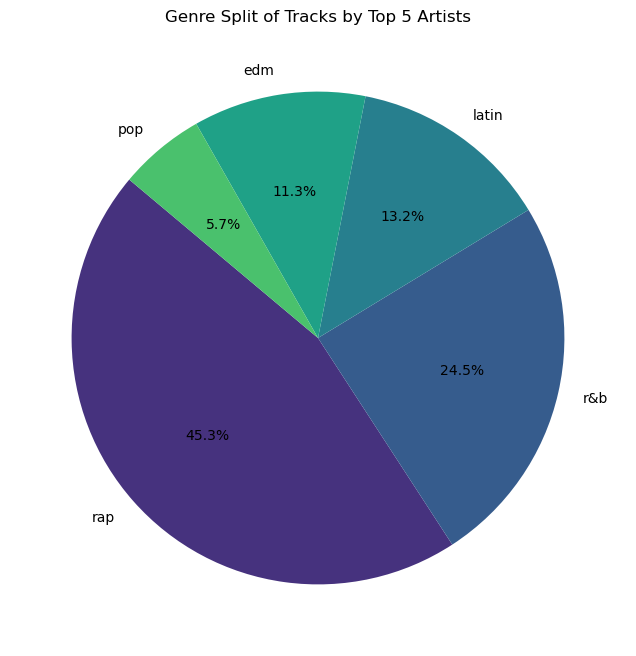

In [23]:
# What genres are the top 5 most popular artists working in?
#Show a pie chart showing the split of genres of tracks produced
#by the top 5 artist (25% pop, 40% EDM etc.)

# Find the top 5 most popular artists
top_artists = df.groupby('track_artist')['track_popularity'].mean().nlargest(5).index

# Filter the DataFrame for tracks by the top 5 artists
top_tracks = df[df['track_artist'].isin(top_artists)]
# Get the count of tracks in each genre
genre_counts = top_tracks['playlist_genre'].value_counts()

# Plot a pie chart
plt.figure(figsize=(10, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Genre Split of Tracks by Top 5 Artists')
plt.show()




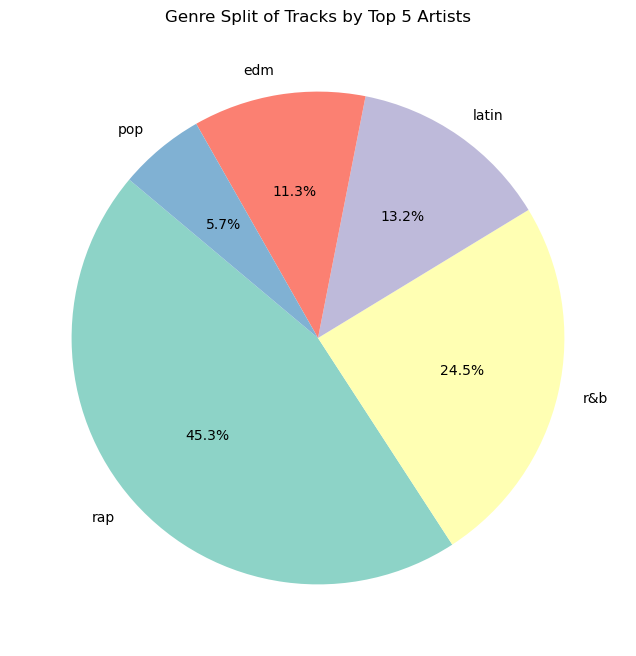

In [8]:
# What genres are the top 5 most popular artists working in?
#Show a pie chart showing the split of genres of tracks produced
#by the top 5 artist (25% pop, 40% EDM etc.)

# Find the top 5 most popular artists
top_artists = df.groupby('track_artist')['track_popularity'].mean().nlargest(5).index

# Filter the DataFrame for tracks by the top 5 artists
top_tracks = df[df['track_artist'].isin(top_artists)]

# Get the count of tracks in each genre
genre_counts = top_tracks['playlist_genre'].value_counts()

# Choose a different Seaborn color palette
custom_palette = sns.color_palette('Set3')

# Plot a pie chart with a custom Seaborn color palette
plt.figure(figsize=(10, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_palette)
plt.title('Genre Split of Tracks by Top 5 Artists')
plt.show()


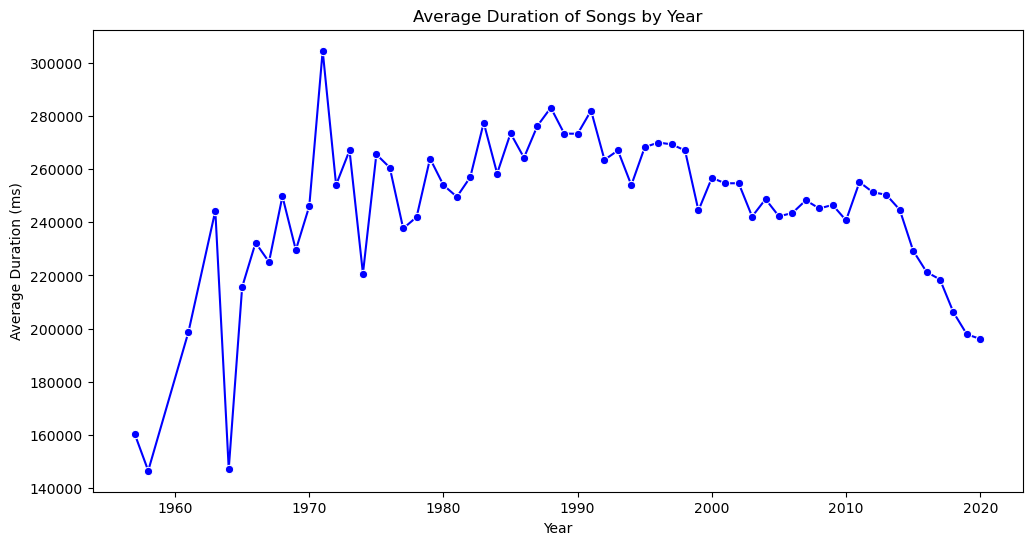

In [18]:
#Are songs getting shorter?
#Show a plot showing average duration by year

# Handle missing dates and set a default day and month
df['track_album_release_date'] = df['track_album_release_date'].fillna('1900-01-01')

# Try to convert to datetime, if not possible, fill with NaN
df['release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')

# Extract the year from the release date
df['release_year'] = df['release_date'].dt.year

# Plot average duration by year
average_duration_by_year = df.groupby('release_year')['duration_ms'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=average_duration_by_year.index, y=average_duration_by_year.values, marker='o', color='blue')
plt.title('Average Duration of Songs by Year')
plt.xlabel('Year')
plt.ylabel('Average Duration (ms)')
plt.show()


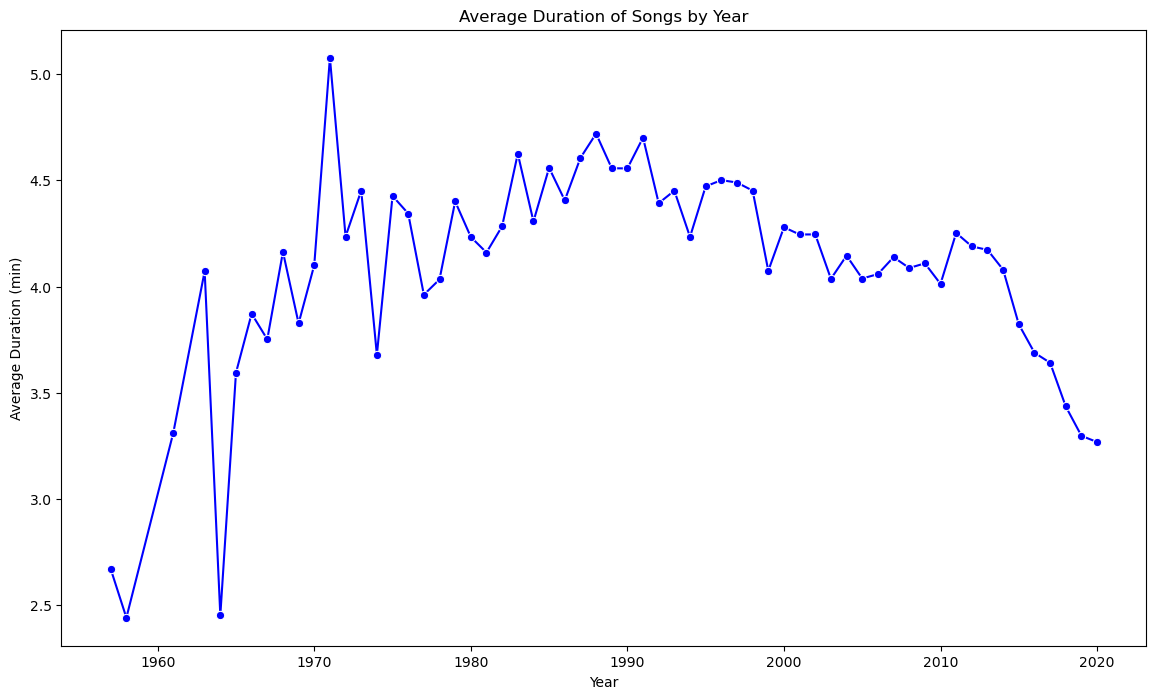

release_year
1957.0    2.670450
1958.0    2.441333
1961.0    3.312667
1963.0    4.072221
1964.0    2.452277
            ...   
2016.0    3.688423
2017.0    3.641185
2018.0    3.435472
2019.0    3.297309
2020.0    3.268089
Name: duration_sec, Length: 61, dtype: float64


In [10]:
#Are songs getting shorter?
#Show a plot showing average duration by year

# Handle missing dates and set a default day and month
df['track_album_release_date'] = df['track_album_release_date'].fillna('1900-01-01')

# Try to convert to datetime, if not possible, fill with NaN
df['release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')

# Extract the year from the release date
df['release_year'] = df['release_date'].dt.year

# Convert duration from milliseconds to seconds
df['duration_sec'] = df['duration_ms'] / 1000 / 60

# Plot average duration by year
average_duration_by_year = df.groupby('release_year')['duration_sec'].mean()

plt.figure(figsize=(14, 8))
sns.lineplot(x=average_duration_by_year.index, y=average_duration_by_year.values, marker='o', color='blue')
plt.title('Average Duration of Songs by Year')
plt.xlabel('Year')
plt.ylabel('Average Duration (min)')
plt.show()
print(average_duration_by_year)

In [11]:
#How has genres evolved over time?
#Show a plot showing count of songs within a genre each year

# Handle missing dates and set a default day and month
df['track_album_release_date'] = df['track_album_release_date'].fillna('1900-01-01')

# Try to convert to datetime, if not possible, fill with NaN
df['release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')

# Extract the year from the release date
df['release_year'] = df['release_date'].dt.year

# Plot count of songs within each genre for each year
plt.figure(figsize=(170, 170))
sns.countplot(x='release_year', hue='playlist_genre', data=df)
plt.title('Count of Songs Within Each Genre Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Genre', bbox_to_anchor=(1, 1))
plt.show()


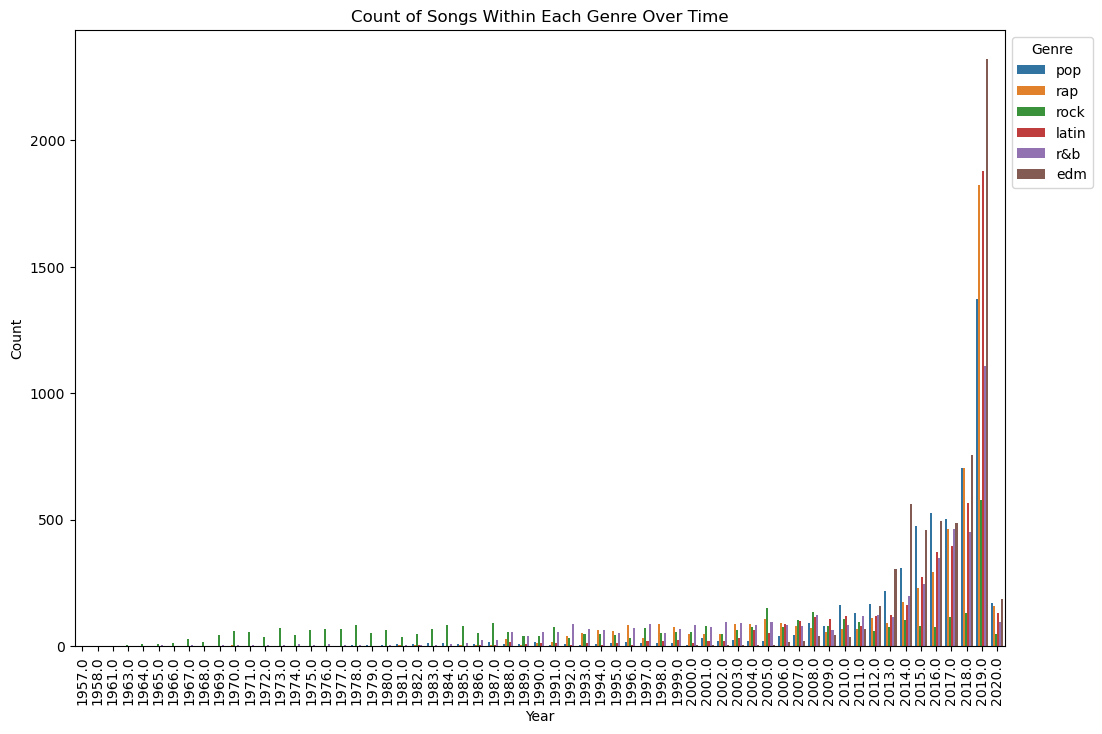

In [12]:
#How has genres evolved over time?
#Show a plot showing count of songs within a genre each year

# Handle missing dates and set a default day and month
df['track_album_release_date'] = df['track_album_release_date'].fillna('1900-01-01')

# Try to convert to datetime, if not possible, fill with NaN
df['release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')

# Extract the year from the release date
df['release_year'] = df['release_date'].dt.year

# Plot count of songs within each genre for each year
plt.figure(figsize=(12, 8))
sns.countplot(x='release_year', hue='playlist_genre', data=df)
plt.title('Count of Songs Within Each Genre Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Genre', bbox_to_anchor=(1, 1))
plt.show()


In [13]:
# Group by genre and calculate the average danceability for each genre
average_danceability = df.groupby('playlist_genre')['danceability'].mean()

# Get the top 5 most danceable genres
top_danceable_genres = average_danceability.nlargest(5)

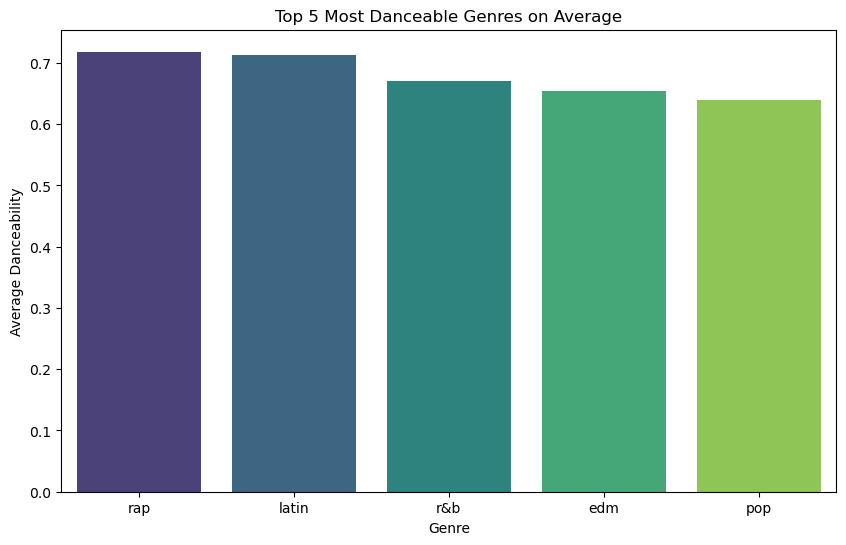

In [14]:
# Plot a vertical bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_danceable_genres.index, y=top_danceable_genres.values, palette='viridis')
plt.title('Top 5 Most Danceable Genres on Average')
plt.xlabel('Genre')
plt.ylabel('Average Danceability')
plt.show()